# S&M Final Project

The goal of this project is to create projections for Canada's population based on census data from 1950 - 2022.

We start by importing the necessary libraries and dependencies.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modsim import *

Next we wrangle the census data located in the .csv file into a pandas dataframe.

In [3]:
filename = 'canada-population-2023-04-02.csv'
df = pd.read_csv(filename)

df.head()

,Year,Pop,AGR
0,1950,13743069,NaN
1,1951,14085724,2.49
2,1952,14485745,2.84
3,1953,14901525,2.87
4,1954,15323201,2.83


 The data contains 3 columns: Year, Population and Annual Growth Rate. Now that our data is in a form where we are able to manipulate it we can create a simple model of Canada's population history over time.

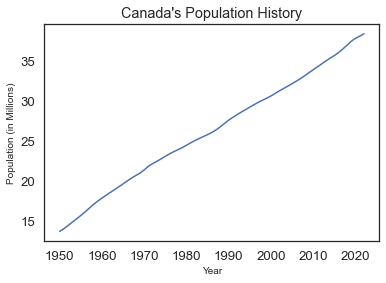

In [4]:
def plot_pop_census():
    plt.plot(df.Year,(df.Pop/1e6), label="Census Data")
    plt.xlabel("Year")
    plt.ylabel("Population (in Millions)")
    plt.title("Canada's Population History")

plot_pop_census()

This model gives us a basic idea of Canada's population growth over the past 70 years. However, in order to create accurate projections we want to use the annual growth rate. To get a good visualization of this data we should create a model of the annual growth rate over time.

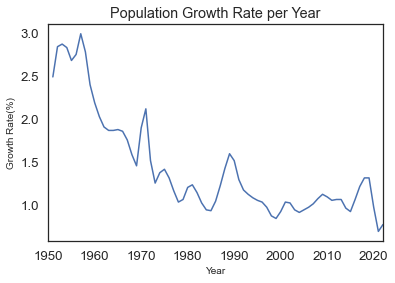

In [5]:
def plot_gr_census():
    plt.plot(df.Year,df.AGR, label="Census Growth Rate")
    plt.xlim(1950,2022)
    plt.xlabel("Year")
    plt.ylabel("Growth Rate(%)")
    plt.title("Population Growth Rate per Year")

plot_gr_census()

Now that we have a good visualization of how the annual growth rate has changed, we should fit a line to the data and extrapolate into the future so we can form projections.

To find the line of best fit we simply create a linear regression function that recieves a year t and using a predetermined y-intercept and slope returns value y. We then create an array of these t values to feed the function and an array of points is returned giving us our line of best fit.

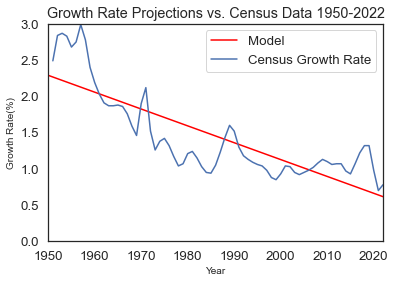

In [6]:
def alpha_func(t):
    intercept = 2.29
    slope = -0.02325
    return intercept + slope * (t - 1950)

t_array = linspace(1950, 2022, 72)
alpha_array = alpha_func(t_array)

def plot_growth_comparison():
    plt.plot(t_array, alpha_array, label='Model', color='red')
    plt.plot(df.Year,df.AGR, label="Census Growth Rate")
    plt.xlim(1950,2022)
    plt.ylim(0,3)
    plt.xlabel("Year")
    plt.ylabel("Growth Rate(%)")
    plt.title("Growth Rate Projections vs. Census Data 1950-2022")
    plt.legend()

plot_growth_comparison()

This line seems to fit our data quite well. Now all we need to do is model our population as the sum of the current population value plus the same population value multiplied by the linear regression value.

In [18]:
t_0 = 1950
t_end = 2120
p_0 = df.iloc[1,1]

pop_results = TimeSeries()
pop_results[t_0] = p_0

for t in range(t_0, t_end):
    pop_results[t+1] = pop_results[t] + pop_results[t]*alpha_func(t)/100

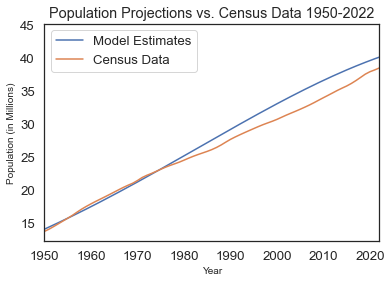

In [24]:
def plot_pop_estimates():
    plt.plot(pop_results.index,(pop_results/1e6))
    plt.xlim(1950,2125)
    plt.ylim(20,50)
    plt.xlabel("Year")
    plt.ylabel("Population (in Millions)")
    plt.title("Projected Population of Canada")

def plot_pop_comparison():
    plt.plot(pop_results.index,(pop_results/1e6), label="Model Estimates")
    plt.plot(df.Year,(df.Pop/1e6), label="Census Data")
    plt.xlim(1950,2022)
    plt.xlabel("Year")
    plt.ylabel("Population (in Millions)")
    plt.title("Population Projections vs. Census Data 1950-2022")
    plt.legend()

plot_pop_comparison()

As we can see from the comparison this model follows the actual data quite closely for the first 30 years before diverging slightly. This is to be expected as there are many factors involved in population growth and the model will not be completely acccurate.

We can now extrapolate this data by 100 years to get our future projections of Canada's population.

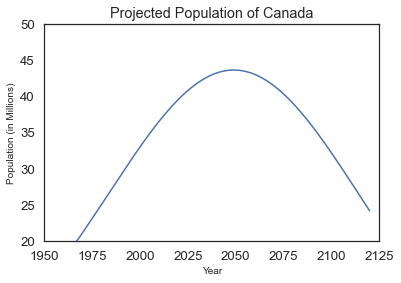

In [25]:
plot_pop_estimates()

As we can see, following the current growth rate trend the population of Canada will reach a maximum population of approximately 43 million some time around 2040 before decreasing steadily to 25 million by 2120.